<a href="https://colab.research.google.com/github/DEEPAK-RAMGIRI/Information-Retrieval-System-IRS-/blob/main/IR_Lab_Assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install numpy==1.24.3 scipy==1.10.1 gensim==4.3.3
# Import required libraries
import gensim.downloader as api
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Load Google's pre-trained Word2Vec model (300-dimensional vectors)
model = api.load("word2vec-google-news-300")
print("✅ Word2Vec model loaded successfully!")

✅ Word2Vec model loaded successfully!


In [ ]:
# Find words similar to "intelligent"
similar_words = model.most_similar("intelligent", topn=5)
print("\n🔍 Words similar to 'intelligent':")
for word, similarity in similar_words:
    print(f"  {word}: {similarity:.4f}")


🔍 Words similar to 'intelligent':
  smart: 0.6495
  wheelchair_TAO: 0.6184
  thoughtful: 0.5460
  creationism_repackaged: 0.5403
  perceptive: 0.5365


In [ ]:
# Word analogy example: "King" is to "Man" as "?" is to "Woman"
analogy_result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(f"\n👑 'King' is to 'Man' as '{analogy_result[0][0]}' is to 'Woman' (Similarity: {analogy_result[0][1]:.4f})")


👑 'King' is to 'Man' as 'queen' is to 'Woman' (Similarity: 0.7118)


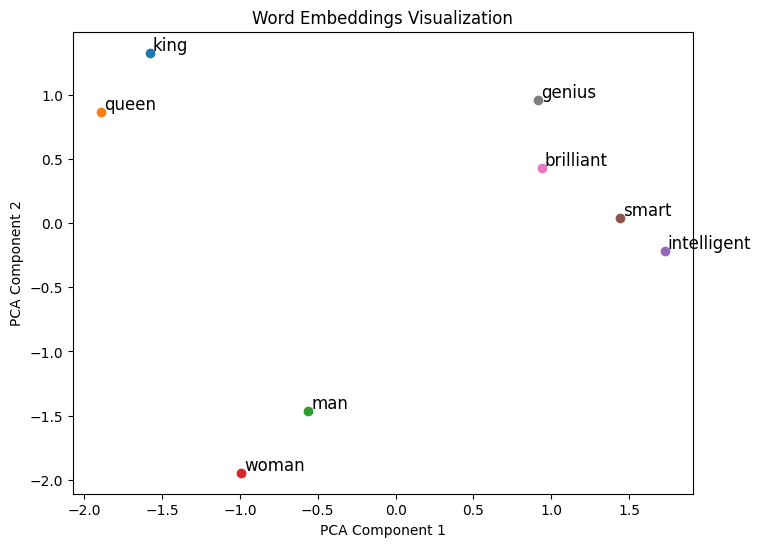

In [ ]:
# Visualizing word embeddings
words = ['king', 'queen', 'man', 'woman', 'intelligent', 'smart', 'brilliant', 'genius']
word_vectors = np.array([model[word] for word in words])

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot words in 2D space
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Word Embeddings Visualization")
plt.show()